In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import torch

num_epochs = 45 
gamma = 1

filename = f'{num_epochs}_iters_8batch_{gamma}gamma'
file_path = f'data/UNet_40_epochs/Trials/{filename}.pkl'
with open(file_path, 'rb') as fp:
    data_tr_val = pickle.load(fp)

In [58]:
# ===== Training curves =====
train_acc_history = data_tr_val["train_acc_history"]
train_soft_acc_history = data_tr_val["train_soft_acc_history"]
val_acc_history = data_tr_val["val_acc_history"]
val_soft_acc_history = data_tr_val["val_soft_acc_history"]
train_f1_history = data_tr_val["train_f1_history"]
val_f1_history = data_tr_val["val_f1_history"]
train_loss_history = data_tr_val["train_loss_history"]
val_loss_history = data_tr_val["val_loss_history"]
lr_history = data_tr_val["lr_history"]

n_train = len(train_acc_history)
t_train = num_epochs * np.arange(n_train) / n_train
t_val = np.arange(1, num_epochs + 1)


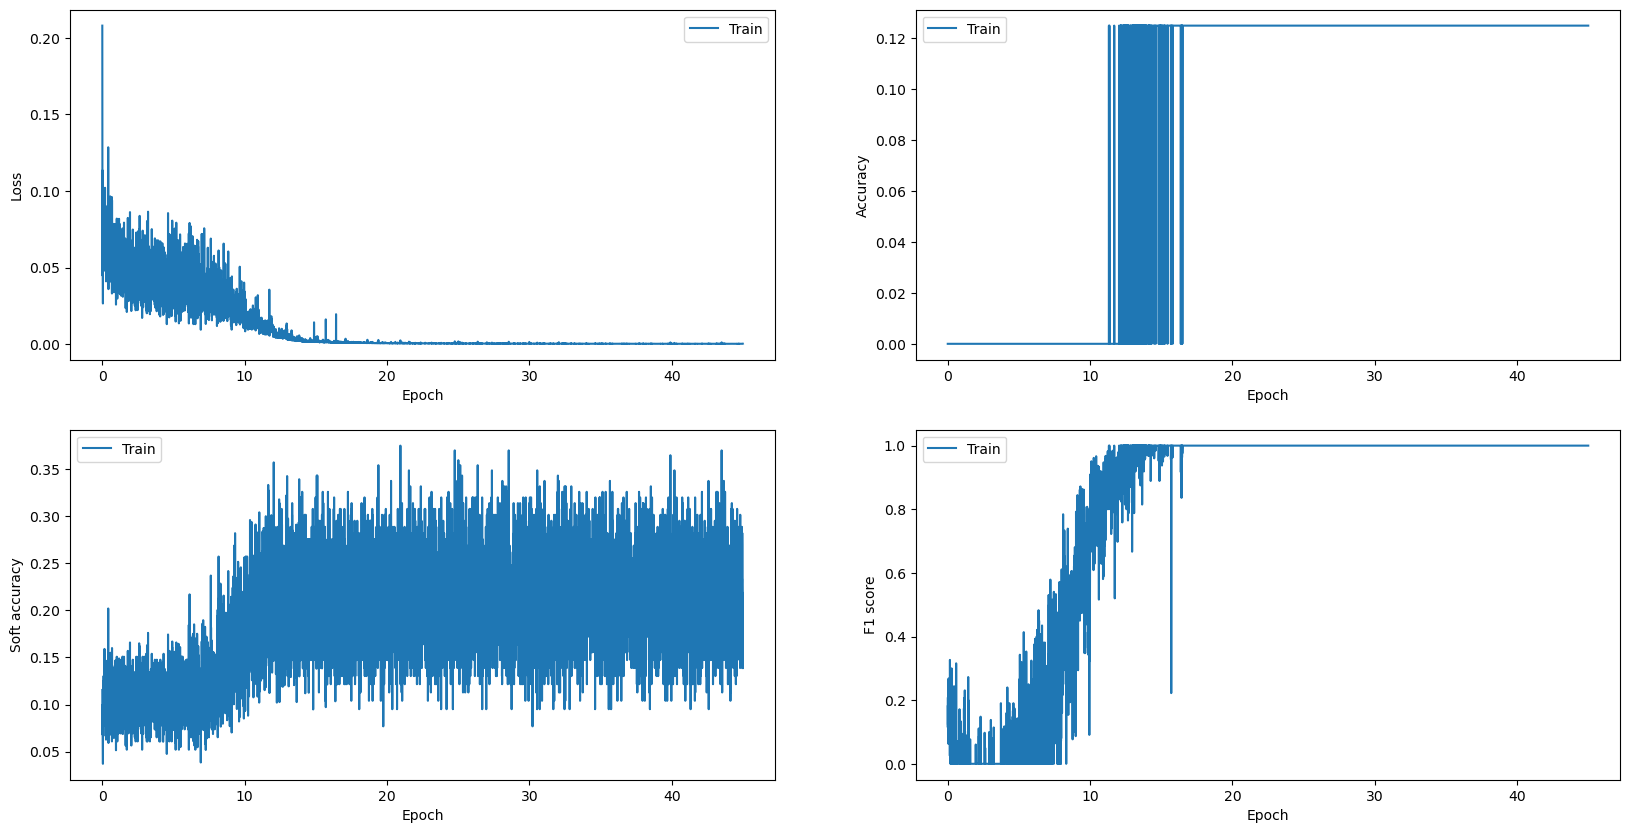

In [59]:
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 2)
plt.plot(t_train, train_acc_history, label="Train")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.subplot(2, 2, 4)
plt.plot(t_train, train_f1_history, label="Train")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("F1 score")

plt.subplot(2, 2, 1)
plt.plot(t_train, train_loss_history, label="Train")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")


plt.subplot(2, 2, 3)
plt.plot(t_train, train_soft_acc_history, label="Train")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Soft accuracy")
#.savefig(file_path + f"{filename}.png")
plt.show()

# Test the model and make predictions

In [23]:
# === Load the data ===    
from Data_processing import get_data, get_dataloaders  
  
file_path = 'data/resampled_epochs_subj_0_corrected.pkl'
epochs, labels = get_data(file_path)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 1
data_kwargs = dict(
epochs=epochs[:100],
labels=labels[:100],
batch_size=batch_size
)
train_loader, val_loader, test_loader = get_dataloaders(**data_kwargs)
print("Data loaded")

Dataset is split
Data loaded


In [24]:
from UNet.model import UNet
from UNet.train_functions import predict
from UNet.loss import FocalLoss
from UNet.train_functions import get_predictions

# === Show some images ===
file_path = f'data/UNet_40_epochs/Models/{filename}.pth'

# Initialize the model
model = UNet(n_channels=1, n_classes=2) 
model = model.double()
criterion = FocalLoss(gamma=gamma)

# Load the state_dict into the model
model.load_state_dict(torch.load(file_path, map_location=torch.device('cpu')))

points,losses = get_predictions(model, device, test_loader, criterion, num=None)

predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...
predicting...


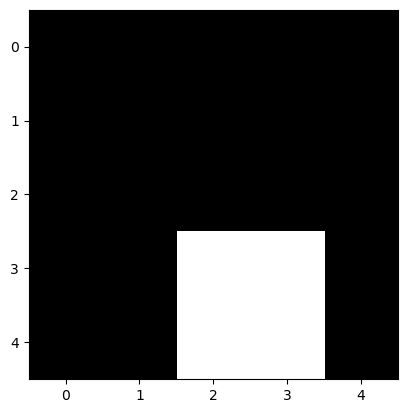

In [29]:
plt.imshow(points[0]['target'][0,:,:].astype(int), cmap='gray', interpolation='nearest')
plt.show()

In [47]:
# find the index of the 3 points with the highest loss
idx_high = np.argsort(losses)[-3:]
# find the index of the 2 points with the lowest loss
idx_low = np.argsort(losses)[:2]
# concatenate the indices
idx = np.concatenate((idx_low, idx_high))

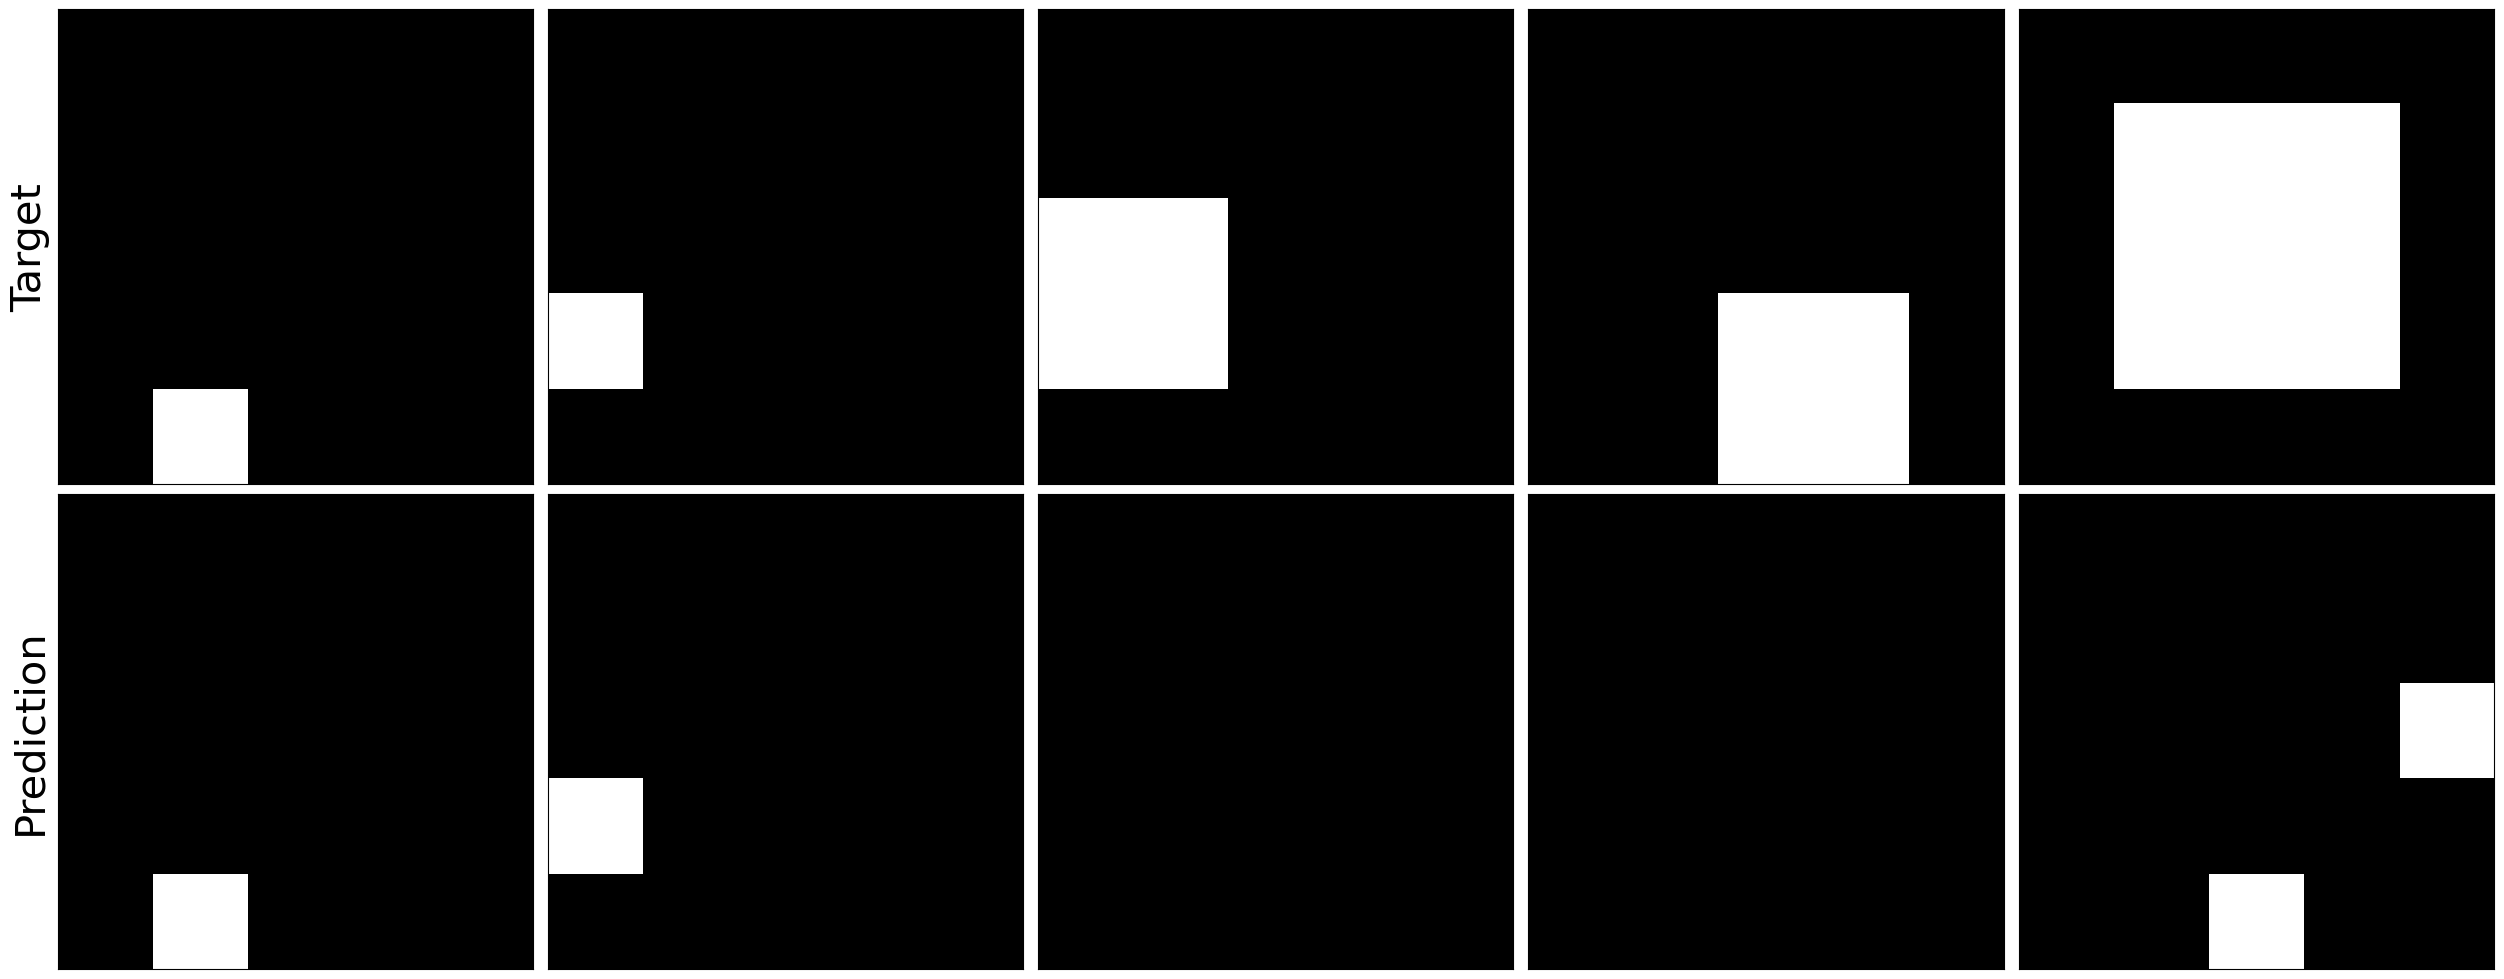

In [57]:
plt.figure(figsize=(25, 10))

for i in range(5):
    index = idx[i]
    # Plot for target
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(points[index]['target'][0,:,:].astype(int), cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    if i == 0:
        plt.text(-0.1, 0.5, 'Target', va='center', rotation='vertical', transform=plt.gca().transAxes, fontsize=30)

    # Plot for prediction
    ax = plt.subplot(2, 5, i+6)
    plt.imshow(points[index]['predict'][0,:,:].astype(int), cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    if i == 0:
        plt.text(-0.1, 0.5, 'Prediction', va='center', rotation='vertical', transform=plt.gca().transAxes, fontsize=30)

    # Display the loss at the bottom of the figure
    #plt.figtext(0.1 + 0.2*i, -0.03, "Loss: {:.4f}".format(losses[index]), ha="center", fontsize=30, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.show()